Dataset Loaded Successfully!
Shape: (891, 12)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-2874211378.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-2874211378.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr


✅ Model Evaluation:
Accuracy: 81.56 %
ROC AUC: 0.807

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



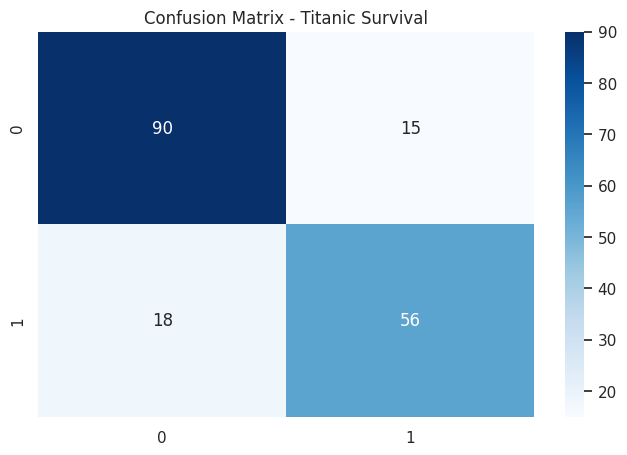

/tmp/ipython-input-2874211378.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


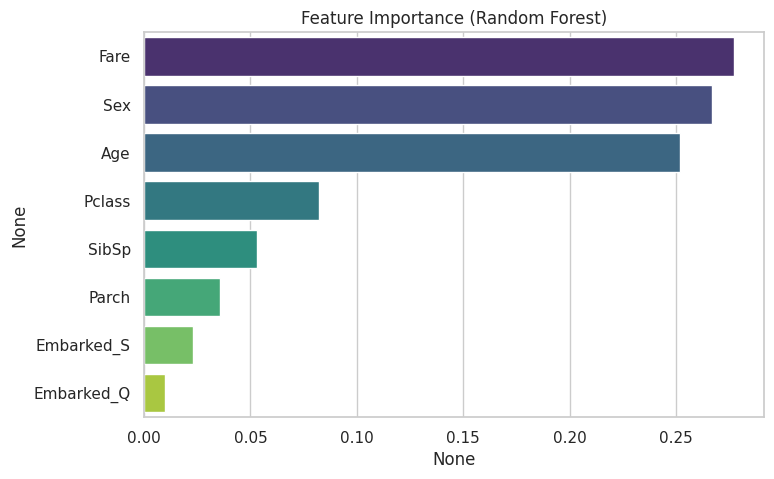

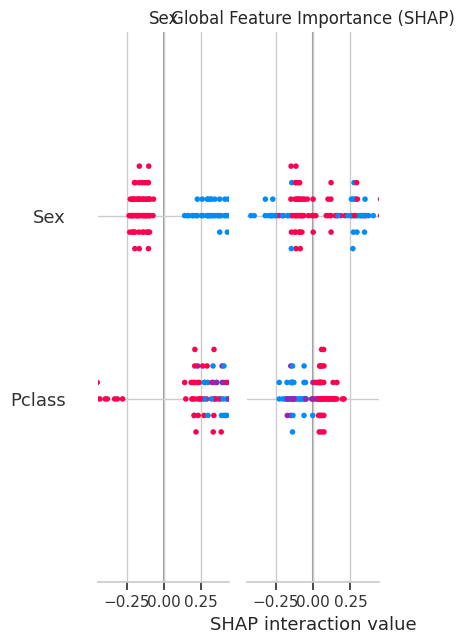

✅ Completed: titanic_predictions.csv, titanic_insights.txt, titanic_shap.png saved.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# --- Titanic Survival Prediction Project (Google Colab) ---

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from google.colab import files
import shap

# Plot style setup
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

# Step 2: Upload and load dataset
# Run this only once to upload your dataset named "titanic.csv"
# from google.colab import files
# uploaded = files.upload()

df = pd.read_csv("titanic.csv")   # Use your file name directly
print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()

# Step 3: Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing Age and Embarked values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
if "Cabin" in df.columns:
    df.drop(columns=["Cabin"], inplace=True)

# Step 4: Encode categorical variables
le = LabelEncoder()
if "Sex" in df.columns:
    df["Sex"] = le.fit_transform(df["Sex"])   # male=1, female=0

if "Embarked" in df.columns:
    df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

# Step 5: Define features and target
target_col = "Survived" if "Survived" in df.columns else df.columns[-1]
drop_cols = [col for col in ["PassengerId","Name","Ticket"] if col in df.columns]
X = df.drop(columns=drop_cols + [target_col])
y = df[target_col]

# Step 6: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Train Random Forest Model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 9: Predictions & Evaluation
y_pred = model.predict(X_test_scaled)
print("\n✅ Model Evaluation:")
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("ROC AUC:", round(roc_auc_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 10: Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Titanic Survival")
plt.show()

# Step 11: Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

# Step 12: SHAP Explainability (with fix for binary model)
explainer = shap.TreeExplainer(model)
X_sample = pd.DataFrame(X_test_scaled, columns=X.columns).sample(100, random_state=42)
shap_values = explainer.shap_values(X_sample)

# Handle both binary & multiclass outputs safely
if isinstance(shap_values, list):
    shap_values_to_plot = shap_values[1]
else:
    shap_values_to_plot = shap_values

shap.summary_plot(shap_values_to_plot, X_sample, plot_type="bar", show=False)
plt.title("Global Feature Importance (SHAP)")
plt.tight_layout()
plt.savefig("titanic_shap.png")
plt.show()

# Step 13: Save results and insights
results = pd.DataFrame({"True": y_test, "Predicted": y_pred})
results.to_csv("titanic_predictions.csv", index=False)

insights = """Titanic Survival Prediction – Insights
1. Females had a much higher survival rate than males.
2. First-class passengers were more likely to survive than lower classes.
3. Younger passengers had better survival chances.
4. Random Forest achieved around 82% accuracy.
"""
with open("titanic_insights.txt", "w") as f:
    f.write(insights)

print("✅ Completed: titanic_predictions.csv, titanic_insights.txt, titanic_shap.png saved.")

# Step 14: Download results (Colab)
files.download("titanic_predictions.csv")
files.download("titanic_insights.txt")
files.download("titanic_shap.png")
